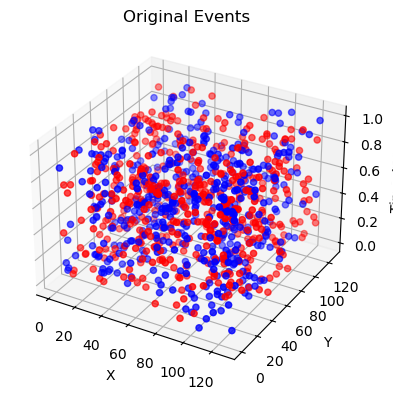

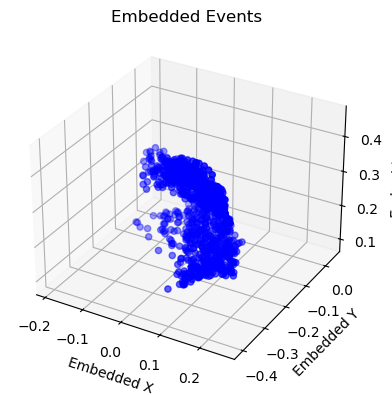

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic events
def generate_synthetic_events(num_events, sensor_width, sensor_height):
    timestamps = np.random.uniform(0, 1, num_events)
    x_coords = np.random.randint(0, sensor_width, num_events)
    y_coords = np.random.randint(0, sensor_height, num_events)
    polarities = np.random.choice([-1, 1], num_events)
    events = np.vstack((timestamps, x_coords, y_coords, polarities)).T
    return events

# Normalize the events
def normalize_events(events, sensor_width, sensor_height):
    events[:, 0] = (events[:, 0] - events[:, 0].min()) / (events[:, 0].max() - events[:, 0].min())
    events[:, 1] = events[:, 1] / sensor_width
    events[:, 2] = events[:, 2] / sensor_height
    return events

# Define the feedforward neural network
class EventEmbedder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EventEmbedder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Parameters
num_events = 1000
sensor_width = 128
sensor_height = 128
hidden_dim = 64
output_dim = 3  # For 3D visualization of embedded space

# Generate synthetic events
events = generate_synthetic_events(num_events, sensor_width, sensor_height)
normalized_events = normalize_events(events.copy(), sensor_width, sensor_height)
events_tensor = torch.tensor(normalized_events, dtype=torch.float32)

# Initialize the neural network
input_dim = 4
model = EventEmbedder(input_dim, hidden_dim, output_dim)

# Forward pass
embeddings = model(events_tensor).detach().numpy()

# Visualization
def visualize_events(events, title, subplot, is_embedded=False):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(subplot, projection='3d')
    if is_embedded:
        x, y, z = events[:, 0], events[:, 1], events[:, 2]
        ax.scatter(x, y, z, c='b', marker='o')
        ax.set_xlabel('Embedded X')
        ax.set_ylabel('Embedded Y')
        ax.set_zlabel('Embedded Z')
    else:
        t, x, y, p = events[:, 0], events[:, 1], events[:, 2], events[:, 3]
        colors = ['r' if polarity > 0 else 'b' for polarity in p]
        ax.scatter(x, y, t, c=colors, marker='o')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Timestamp')
    ax.set_title(title)
    plt.show()

# Visualize before embedding
visualize_events(events, 'Original Events', 121, is_embedded=False)

# Visualize after embedding
visualize_events(embeddings, 'Embedded Events', 122, is_embedded=True)
